# Data analysis project

# Chicago crimes in 2020 analysis

# Team members:
- 1- Mahmoud Amgad Tolba - 202001143
- 2- Bahaa shamoon Atia - 202001572
- 3- Arwa Khaled Noureldeen 202000849
- 4- Silvana Nageh - 202001817
- 5- Michael Hany - 211001760

### Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#Description">2. Data Description</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#Model">4. Model</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

Crime has been a prevalent anti-social trait in the human society since time immemorial and it continues to be so even today. Anlysing crimes data may help humanity to understand the criminal trends and lower the crime in the world.
Our dataset is mainly about crimes in Chicago in 2020. This dataset is good enough to help us understand and explore some aspects of crime and build a small model to help reduce the crime. 

###    -  dataset size: 51.66MB as CSV file format.

### link for the dataset: https://www.kaggle.com/datasets/salikhussaini49/chicago-crimes?select=Chicago_Crimes_2020.csv

## Libraries Used

   ### pandas
   ### matplotlib
   ### seaborn
   ### numpy
   ### datetime

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

<a id='Description'></a>
## 2. Data Description

In [2]:
#data reading
df = pd.read_csv('Chicago_Crimes_2020.csv')
df2= pd.read_csv('Crimes_Year_Month.csv')
df3= pd.read_csv('crimes_year_month_day.csv')

# 2.1 Data Assessment

In [3]:
df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12017866,JD195314,03/26/2020 09:43:00 AM,003XX W 106TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,...,34.0,49.0,08B,1175918.0,1834635.0,2020,04/02/2020 03:51:12 PM,41.701598,-87.631458,"(41.70159803, -87.631457762)"
1,12134350,JD330898,08/12/2020 09:30:00 PM,0000X W 44TH ST,0820,THEFT,$500 AND UNDER,STREET,0,0,...,3.0,38.0,06,1176630.0,1875843.0,2020,08/19/2020 03:51:27 PM,41.814662,-87.627613,"(41.814661612, -87.627612832)"
2,12132901,JD327850,08/10/2020 11:12:00 PM,030XX N SPAULDING AVE,141A,WEAPONS VIOLATION,UNLAWFUL USE - HANDGUN,ALLEY,0,0,...,35.0,21.0,15,1153853.0,1920123.0,2020,08/17/2020 03:50:01 PM,41.936654,-87.709983,"(41.936653521, -87.709982522)"
3,12137507,JD330148,08/12/2020 07:00:00 PM,014XX E 55TH ST,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,0,0,...,5.0,41.0,07,1187028.0,1868958.0,2020,08/19/2020 03:51:27 PM,41.795528,-87.589691,"(41.795528029, -87.589690678)"
4,12132353,JD328643,08/11/2020 03:45:00 PM,076XX S COLES AVE,0820,THEFT,$500 AND UNDER,APARTMENT,0,0,...,7.0,43.0,06,1196490.0,1854944.0,2020,08/18/2020 03:54:03 PM,41.756843,-87.555459,"(41.756842894, -87.555458776)"
5,12133599,JD329964,08/12/2020 03:45:00 PM,011XX N FRANCISCO AVE,0460,BATTERY,SIMPLE,STREET,0,0,...,26.0,24.0,08B,1156844.0,1907545.0,2020,08/19/2020 03:51:27 PM,41.902078,-87.699332,"(41.902078296, -87.699331932)"
6,12244465,JD458393,12/13/2020 09:40:00 PM,053XX N CALIFORNIA AVE,0460,BATTERY,SIMPLE,APARTMENT,1,1,...,40.0,4.0,08B,1156722.0,1935513.0,2020,12/20/2020 03:50:06 PM,41.978827,-87.699020,"(41.978826879, -87.69901989)"
7,12133642,JD330050,08/10/2020 11:30:00 PM,027XX S INDIANA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,0,0,...,4.0,35.0,14,1178044.0,1886556.0,2020,08/17/2020 03:50:01 PM,41.844027,-87.622101,"(41.844026941, -87.622100808)"
8,12133612,JD329831,08/12/2020 02:37:00 PM,016XX S DRAKE AVE,031A,ROBBERY,ARMED - HANDGUN,STREET,0,0,...,24.0,29.0,03,1152975.0,1891517.0,2020,08/19/2020 03:51:27 PM,41.858173,-87.713968,"(41.858173365, -87.713968258)"
9,12133916,JD330336,08/12/2020 05:45:00 AM,092XX S EGGLESTON AVE,0820,THEFT,$500 AND UNDER,STREET,0,0,...,21.0,73.0,06,1174913.0,1843602.0,2020,08/19/2020 03:51:27 PM,41.726227,-87.634871,"(41.726227161, -87.634871388)"


In [4]:
print("The names of the features :\n", list(df.columns))

The names of the features :
 ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211922 entries, 0 to 211921
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    211922 non-null  int64  
 1   Case Number           211922 non-null  object 
 2   Date                  211922 non-null  object 
 3   Block                 211922 non-null  object 
 4   IUCR                  211922 non-null  object 
 5   Primary Type          211922 non-null  object 
 6   Description           211922 non-null  object 
 7   Location Description  210639 non-null  object 
 8   Arrest                211922 non-null  int64  
 9   Domestic              211922 non-null  int64  
 10  Beat                  211922 non-null  int64  
 11  District              211922 non-null  float64
 12  Ward                  211913 non-null  float64
 13  Community Area        211921 non-null  float64
 14  FBI Code              211922 non-null  object 
 15  

In [6]:
df.describe()

,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.119220e+05,211922.00000,211922.000000,211922.000000,211922.000000,211913.000000,211921.000000,2.084650e+05,2.084650e+05,211922.0,208465.000000,208465.000000
mean,1.205980e+07,0.16063,0.188503,1145.952204,11.230547,22.958587,37.455085,1.164781e+06,1.885229e+06,2020.0,41.840659,-87.670854
std,7.414704e+05,0.36719,0.391114,694.494557,6.940693,13.738629,21.543032,1.636944e+04,3.190592e+04,0.0,0.087750,0.059563
min,2.488900e+04,0.00000,0.000000,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2020.0,41.644590,-87.934567
25%,1.202085e+07,0.00000,0.000000,612.000000,6.000000,10.000000,23.000000,1.152812e+06,1.857909e+06,2020.0,41.765394,-87.714303
50%,1.210210e+07,0.00000,0.000000,1023.000000,10.000000,23.000000,32.000000,1.166385e+06,1.890576e+06,2020.0,41.855191,-87.664896
75%,1.218393e+07,0.00000,0.000000,1712.000000,17.000000,34.000000,56.000000,1.176656e+06,1.908507e+06,2020.0,41.904580,-87.627517
max,1.286633e+07,1.00000,1.000000,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951527e+06,2020.0,42.022586,-87.524545


In [7]:
df.dtypes.count()

22

In [8]:
# Numerica Variables
cont = df._get_numeric_data().columns
print("Numeric variables : ",list(cont))
print(len(cont))

Numeric variables :  ['ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']
12


In [9]:
# Categorical Variables
print("Categorical variables: ",list(set(df.columns) - set(cont)))
print(len(list(set(df.columns) - set(cont))))

Categorical variables:  ['Location Description', 'Primary Type', 'FBI Code', 'Date', 'Location', 'Description', 'IUCR', 'Block', 'Case Number', 'Updated On']
10


In [10]:
# Number of distinct crimes in the city in 2020
crimes = df['Primary Type'].unique()
print("The Number of distinct crimes in Chicago in the year 2020:", len(crimes))
print()
print("The Distinct Crimes are :\n", crimes)

The Number of distinct crimes in Chicago in the year 2020: 33

The Distinct Crimes are :
 ['BATTERY' 'THEFT' 'WEAPONS VIOLATION' 'MOTOR VEHICLE THEFT'
 'CRIMINAL DAMAGE' 'ROBBERY' 'PUBLIC PEACE VIOLATION'
 'INTERFERENCE WITH PUBLIC OFFICER' 'DECEPTIVE PRACTICE' 'ASSAULT'
 'CRIMINAL SEXUAL ASSAULT' 'OTHER OFFENSE' 'BURGLARY' 'CRIMINAL TRESPASS'
 'KIDNAPPING' 'OFFENSE INVOLVING CHILDREN' 'NARCOTICS' 'GAMBLING'
 'LIQUOR LAW VIOLATION' 'ARSON' 'INTIMIDATION' 'SEX OFFENSE' 'STALKING'
 'CONCEALED CARRY LICENSE VIOLATION' 'OBSCENITY' 'PROSTITUTION' 'HOMICIDE'
 'PUBLIC INDECENCY' 'HUMAN TRAFFICKING' 'OTHER NARCOTIC VIOLATION'
 'CRIM SEXUAL ASSAULT' 'NON-CRIMINAL' 'RITUALISM']


## 2.2 Data Cleaning

# Handling the messing values

In [11]:
# check the null values 
null_values = df.isnull().sum()
print(null_values)
print ("Total null values are " ,sum(null_values))

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1283
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       9
Community Area             1
FBI Code                   0
X Coordinate            3457
Y Coordinate            3457
Year                       0
Updated On                 0
Latitude                3457
Longitude               3457
Location                3457
dtype: int64
Total null values are  18578


In [12]:
df.size

4662284

In [13]:
#calculate the total percentage of the null values
null_count = df.isnull().sum().sum()
total_count = df.size
null_percentage = (null_count / total_count) * 100

print("Null Percentage:", null_percentage)

Null Percentage: 0.39847422422143314


In [14]:
# How many number of null entries per feature ?
missing_values = list(df.isna().sum())  # list of the number of missing values in each column
cols = list(df.columns)
col_finastate=[]
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values
print("The number of missing values -->  per feature is : ")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

The number of missing values -->  per feature is : 


,Others,Location Description,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Location
Missing Values,0,1283,9,1,3457,3457,3457,3457,3457


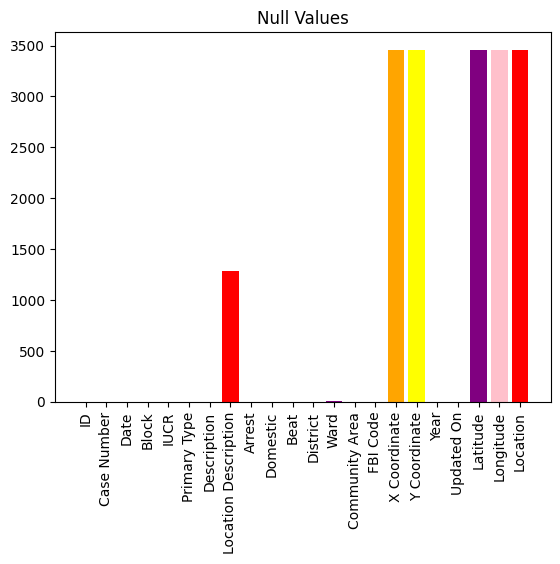

In [15]:
#graph the null values 

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink']
plt.bar(null_values.index, null_values.values, color=colors)
plt.title('Null Values')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Drop all raws which Has at least 1 Null value
df = df.dropna()

# handling the duplicates

In [17]:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
duplicate_data = df[duplicate_rows]
#data_without_duplicates = df.drop_duplicates()

print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


# handling the outliers

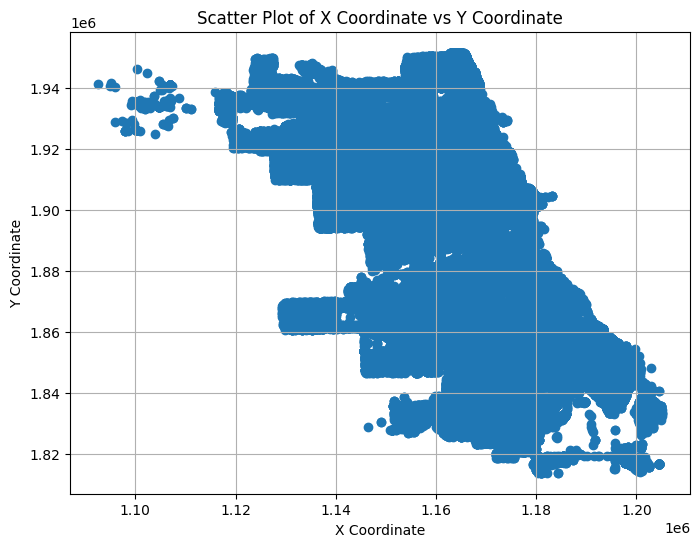

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['X Coordinate'], df['Y Coordinate'])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of X Coordinate vs Y Coordinate')
plt.grid(True)

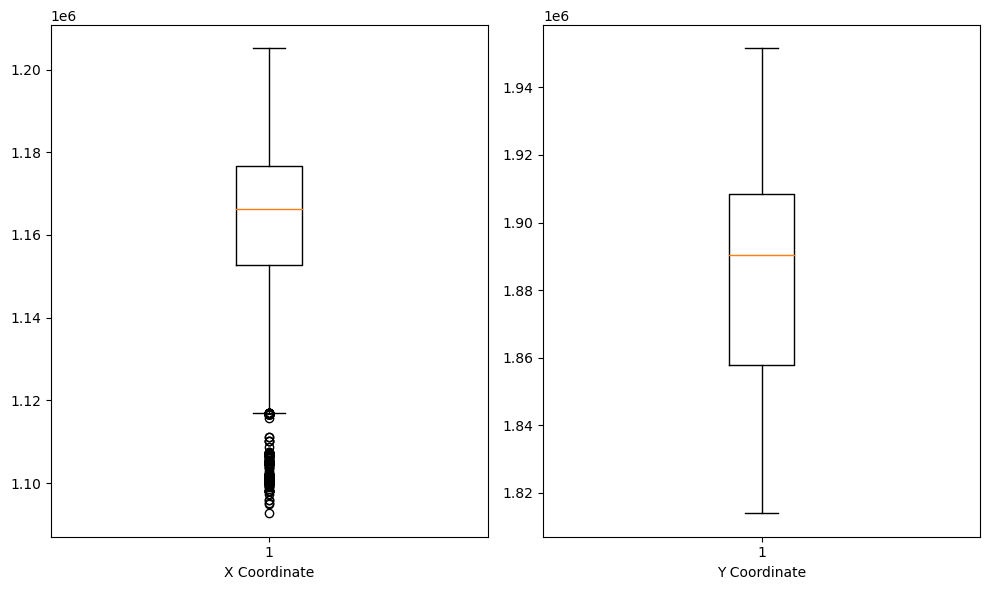

In [19]:
df['X Coordinate'] = df['X Coordinate'].astype(int)
df['Y Coordinate'] = df['Y Coordinate'].astype(int)

# Create box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['X Coordinate'])
plt.xlabel('X Coordinate')
plt.subplot(1, 2, 2)
plt.boxplot(df['Y Coordinate'])
plt.xlabel('Y Coordinate')
plt.tight_layout()
plt.show()

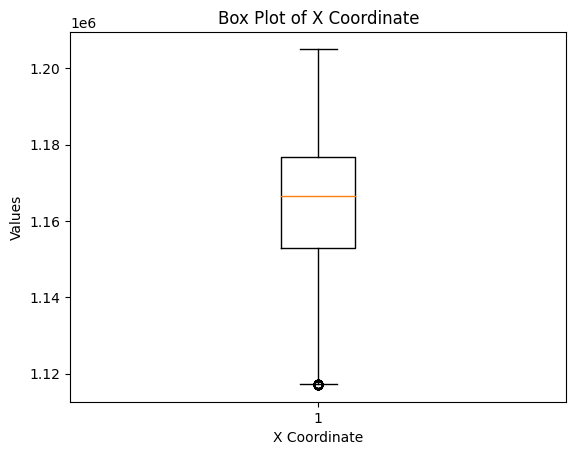

Number of outliers:  820


In [21]:


# Calculate the quartiles and interquartile range (IQR)
Q1 = df['X Coordinate'].quantile(0.25)
Q3 = df['X Coordinate'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers from the DataFrame
df_filtered = df[(df['X Coordinate'] >= lower_bound) & (df['X Coordinate'] <= upper_bound)]



plt.boxplot(df_filtered['X Coordinate'])
plt.xlabel('X Coordinate')
plt.ylabel('Values')
plt.title('Box Plot of X Coordinate')
plt.show()

num_outliers = len(df[(df['X Coordinate'] < lower_bound) | (df['X Coordinate'] > upper_bound)])

# Print the number of outliers
print("Number of outliers: ", num_outliers)

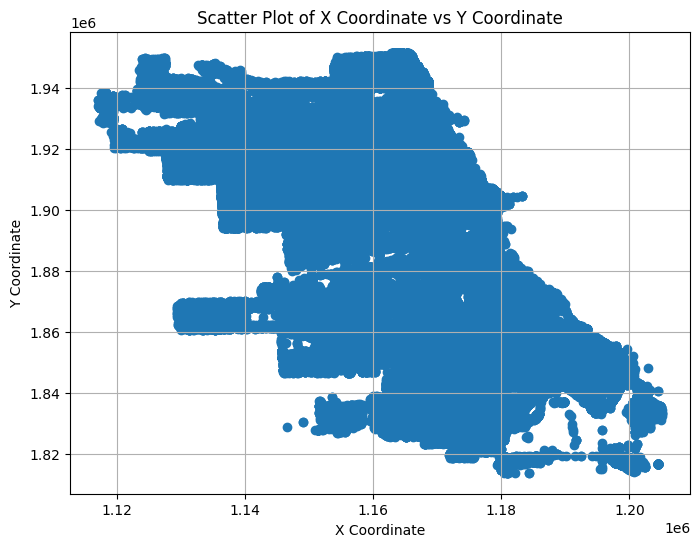

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['X Coordinate'], df_filtered['Y Coordinate'])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of X Coordinate vs Y Coordinate')
plt.grid(True)

# Drop the unnecessary columns

In [24]:
df_filtered.drop(['Case Number','IUCR','Beat','Ward','FBI Code'], axis=1, inplace=True)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_16388\655342365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Case Number','IUCR','Beat','Ward','FBI Code'], axis=1, inplace=True)


<a id='eda'></a>
## 3. Exploratory Data Analysis

- summary statistics
- visualizations
- correlations

# 3.1  Summary statistics

In [25]:
#calculating the main discribtive statistics
summary_stats = df_filtered.describe()

print(summary_stats)

                 ID         Arrest       Domestic       District  \
count  2.066160e+05  206616.000000  206616.000000  206616.000000   
mean   1.205513e+07       0.162011       0.191728      11.183877   
std    7.496580e+05       0.368462       0.393661       6.941086   
min    2.488900e+04       0.000000       0.000000       1.000000   
25%    1.201991e+07       0.000000       0.000000       6.000000   
50%    1.210014e+07       0.000000       0.000000      10.000000   
75%    1.218121e+07       0.000000       0.000000      17.000000   
max    1.284969e+07       1.000000       1.000000      25.000000   

       Community Area  X Coordinate  Y Coordinate      Year       Latitude  \
count   206616.000000  2.066160e+05  2.066160e+05  206616.0  206616.000000   
mean        37.400400  1.165020e+06  1.884980e+06    2020.0      41.839974   
std         21.408101  1.594577e+04  3.179480e+04       0.0       0.087440   
min          1.000000  1.117047e+06  1.813897e+06    2020.0      41.644590 

# 3.2 Visualizations

# points we will cover:
- Crime rate since 2001
- Common Crimes in Chicago
- Crime vs Time
- Crime vs Locations
- Arrests and the City of Chicago


In [26]:
df3 = df3.drop(columns=[df3.columns[0]])
df3.head()

,Day,Count,Year,Month
0,1,18974,2001,1
1,2,16011,2001,1
2,3,15867,2001,1
3,4,16036,2001,1
4,5,15945,2001,1


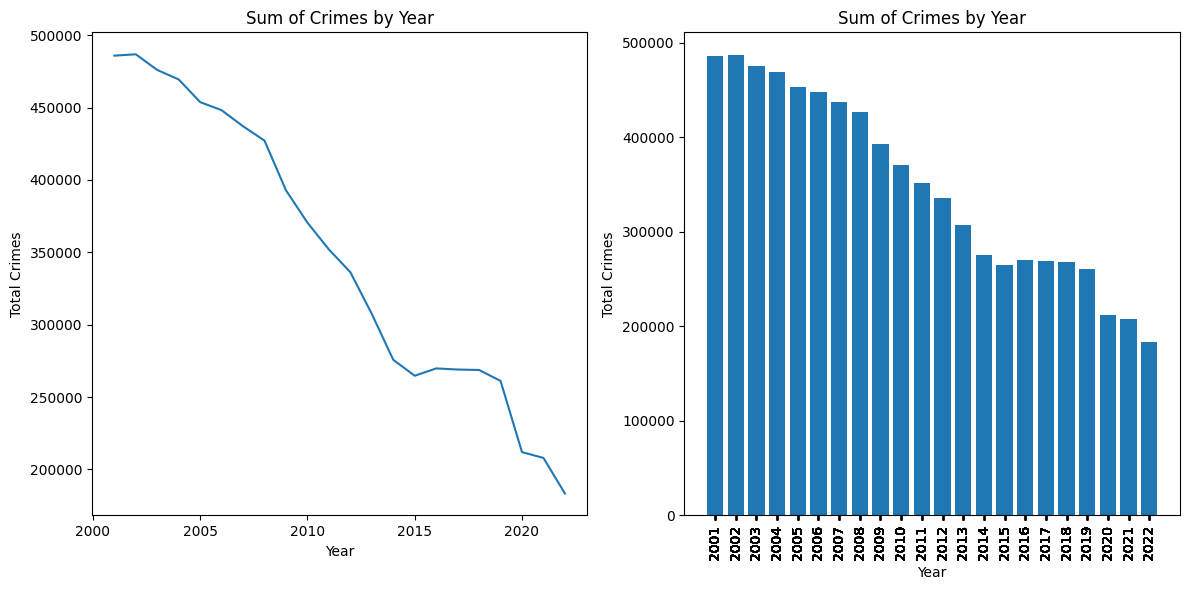

In [27]:
#total number of crims in Each year
grouped_year = df3.groupby(df3['Year'])['Count'].sum()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
plt.xticks(df3['Year'])
plt.xticks(rotation=90)
ax1.plot(grouped_year.index, grouped_year.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Crimes')
ax1.set_title('Sum of Crimes by Year')

ax2.bar(grouped_year.index, grouped_year.values)
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Crimes')
ax2.set_title('Sum of Crimes by Year')
fig.tight_layout()
plt.show()

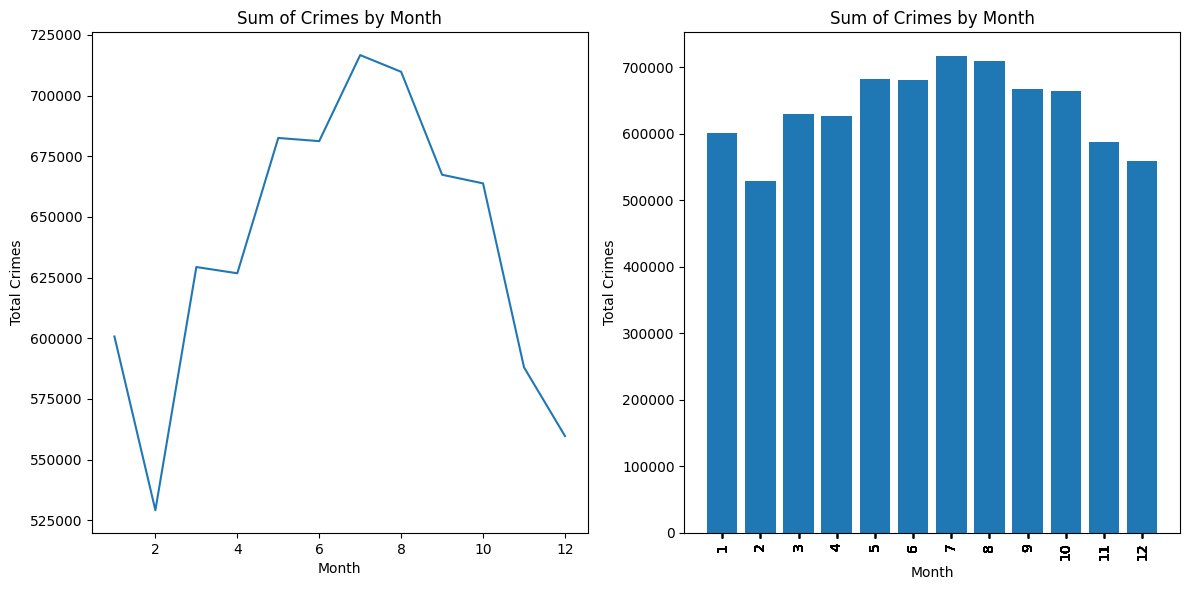

In [28]:
#total number of crims in Each Month


grouped_Month = df2.groupby(df2['Month'])['Count'].sum()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1.plot(grouped_Month.index, grouped_Month.values)
plt.xticks(df2['Month'])
plt.xticks(rotation=90)
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Crimes')
ax1.set_title('Sum of Crimes by Month')


ax2.bar(grouped_Month.index, grouped_Month.values)
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Crimes')
ax2.set_title('Sum of Crimes by Month')
fig.tight_layout()
plt.show()



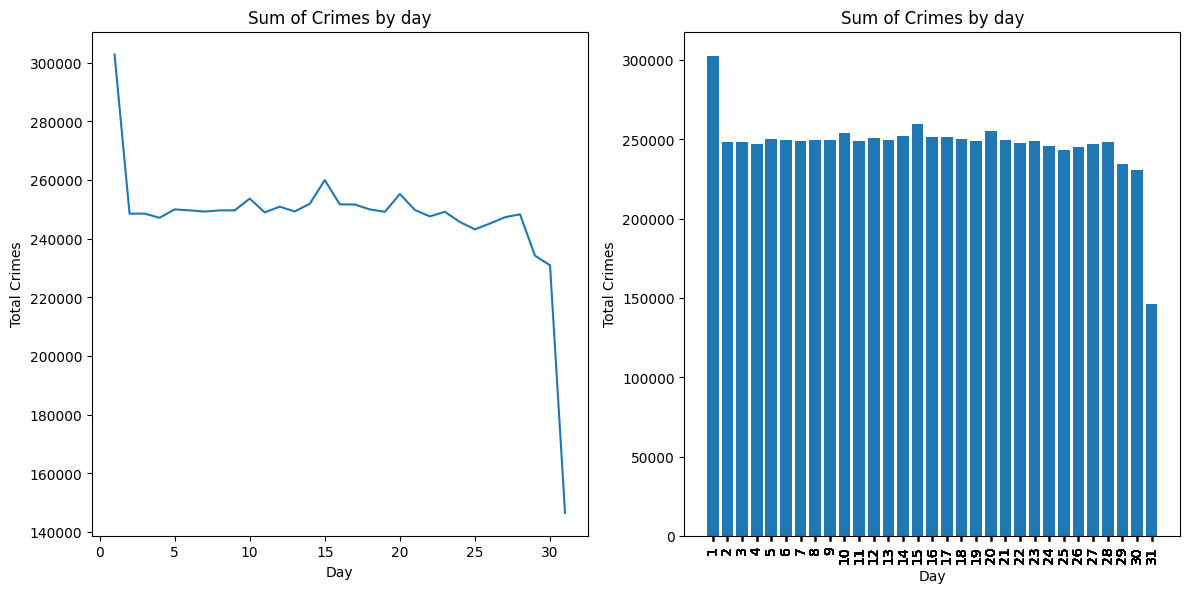

In [29]:
#total number of crims in Each Day since 2001 till 2022
grouped_day = df3.groupby(df3['Day'])['Count'].sum()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1.plot(grouped_day.index, grouped_day.values)
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Crimes')
ax1.set_title('Sum of Crimes by day')


ax2.bar(grouped_day.index, grouped_day.values)
ax2.set_xlabel('Day')
ax2.set_ylabel('Total Crimes')
ax2.set_title('Sum of Crimes by day')
fig.tight_layout()
plt.xticks(df3['Day'])
plt.xticks(rotation=90)
plt.show()


In [30]:
len(df_filtered['Location Description'].unique())

164

In [31]:
# Saparate Time and Date into Two different Column
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered['date'] = df_filtered['Date'].dt.date
df_filtered['time'] = df_filtered['Date'].dt.time

C:\Users\mahmo\AppData\Local\Temp\ipykernel_16388\373520446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
C:\Users\mahmo\AppData\Local\Temp\ipykernel_16388\373520446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['Date'].dt.date
C:\Users\mahmo\AppData\Local\Temp\ipykernel_16388\373520446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

C:\Users\mahmo\AppData\Local\Temp\ipykernel_16388\791635544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
C:\Users\mahmo\AppData\Local\Temp\ipykernel_16388\791635544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['date'].dt.month


<Axes: xlabel='month'>

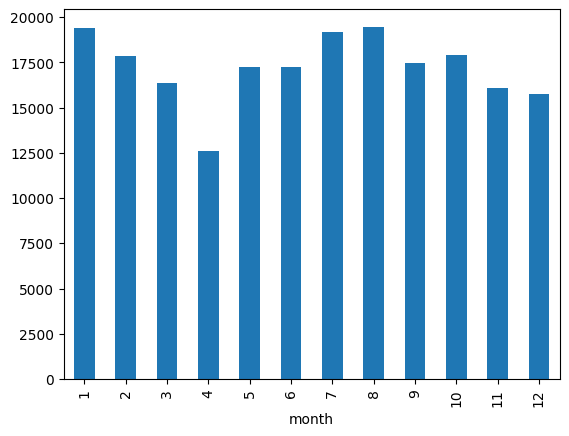

In [32]:
# Number of crimes for each month of 2020 year
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['month'] = df_filtered['date'].dt.month
month_counts = df_filtered.groupby('month').count()['date']
month_counts.plot(kind='bar')

C:\Users\mahmo\AppData\Local\Temp\ipykernel_16388\320954635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day'] = df_filtered['date'].dt.day


<Axes: xlabel='day'>

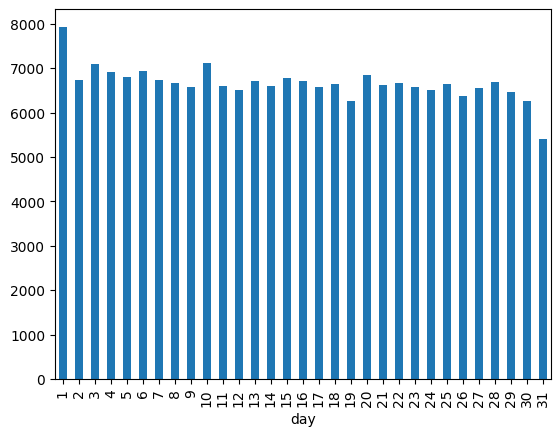

In [33]:
# Number of crimes for each Day of 2020 year
df_filtered['day'] = df_filtered['date'].dt.day
day_counts = df_filtered.groupby('day').count()['date']
day_counts.plot(kind='bar')


<Axes: >

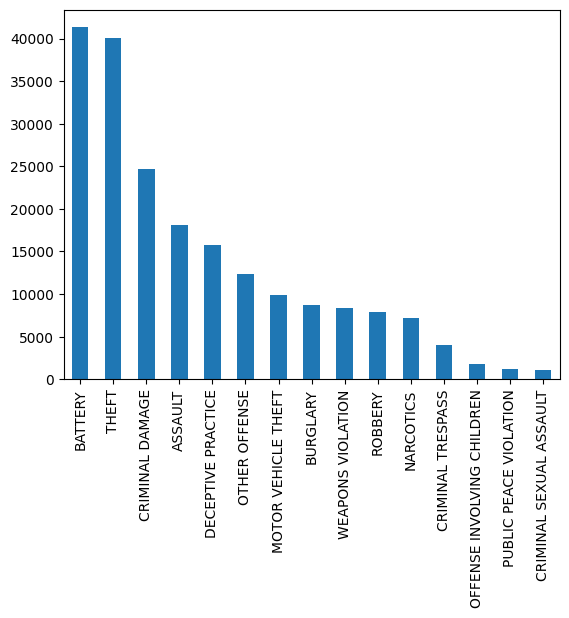

In [34]:
# Most frequent crimes 
value_counts = df_filtered['Primary Type'].value_counts()
filtered_values = value_counts[value_counts >= 1000]
filtered_values.plot(kind='bar')


<Axes: >

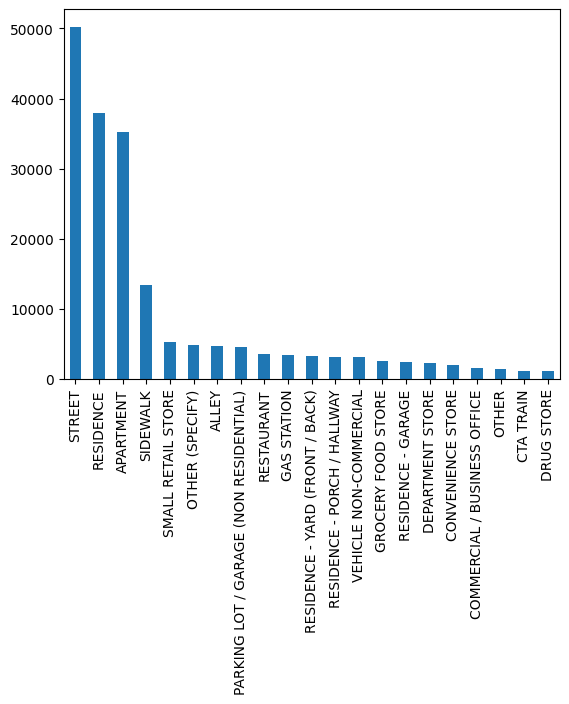

In [35]:
# Most frequent crimes per location
value_counts = df_filtered['Location Description'].value_counts()
filtered_values = value_counts[value_counts >= 1000]
filtered_values.plot(kind='bar')

In [36]:
temp = df_filtered.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
#temp = temp.sort_values(by='ID', ascending=True)
temp.columns=['Crime','Number']
temp.index=[1,2,3,4,5]
temp.head()

,Crime,Number
1,BATTERY,41320
2,THEFT,40030
3,CRIMINAL DAMAGE,24652
4,ASSAULT,18156
5,DECEPTIVE PRACTICE,15789


In [37]:
# the Top 5 criminal districts
top_5_District = df_filtered['District'].value_counts().sort_values(ascending=False).head()
top_5_District

11.0    14781
6.0     13903
8.0     12944
4.0     12103
7.0     11648
Name: District, dtype: int64

In [38]:
#Visualizing Narcotics (To get an understanding of the most prevalent type of drugs in the area)
narc=df_filtered[df_filtered['Primary Type']=='NARCOTICS']
narc_data=pd.DataFrame({"Counts":narc['Description'].value_counts(),"Description":narc['Description'].value_counts().index})
narc_data.reset_index(inplace=True)
narc_data=narc_data.drop(columns=['index'],axis=1)
narc_data.head()

,Counts,Description
0,993,POSSESS - HEROIN (WHITE)
1,592,FOUND SUSPECT NARCOTICS
2,587,POSS: HEROIN(WHITE)
3,480,POSSESS - CRACK
4,413,MANUFACTURE / DELIVER - HEROIN (WHITE)


<Axes: xlabel='Counts', ylabel='Description'>

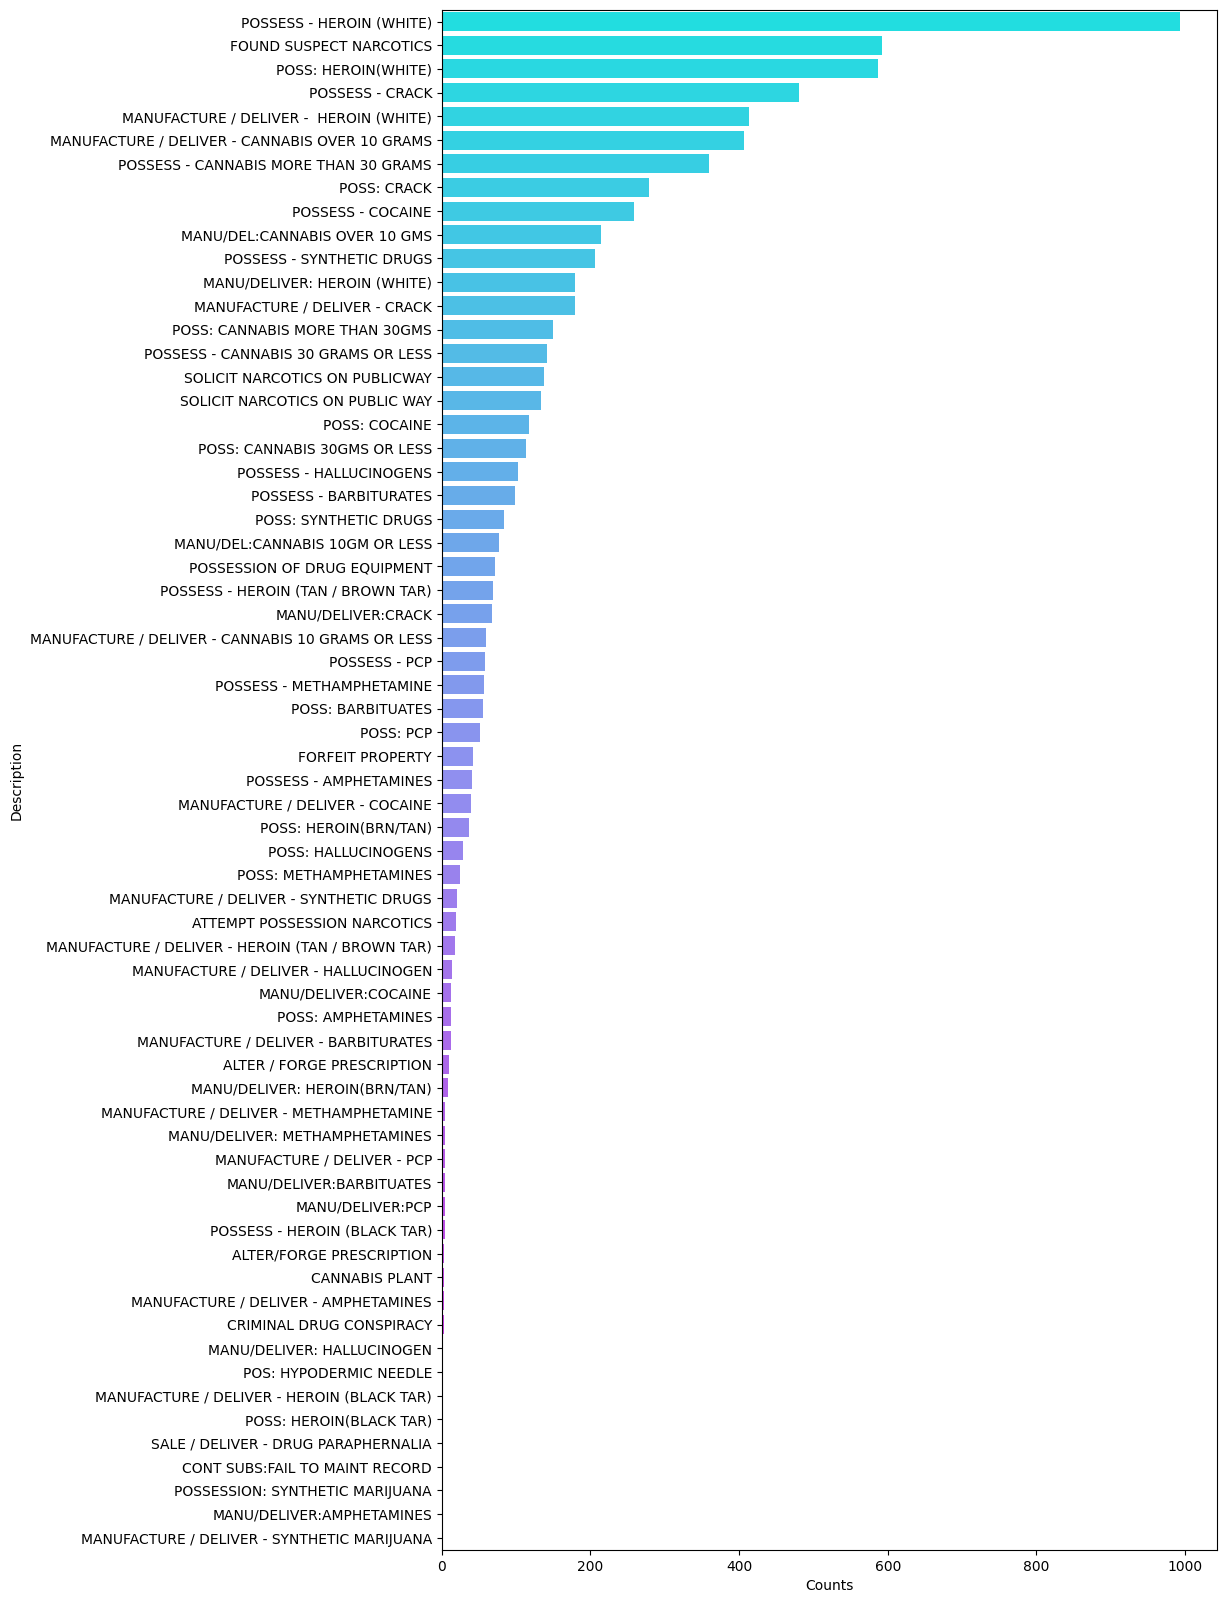

In [39]:
plt.figure(figsize=(10,20))
sns.barplot(y="Description", x= "Counts", data=narc_data,palette="cool")

11.0    2459
Name: District, dtype: int64


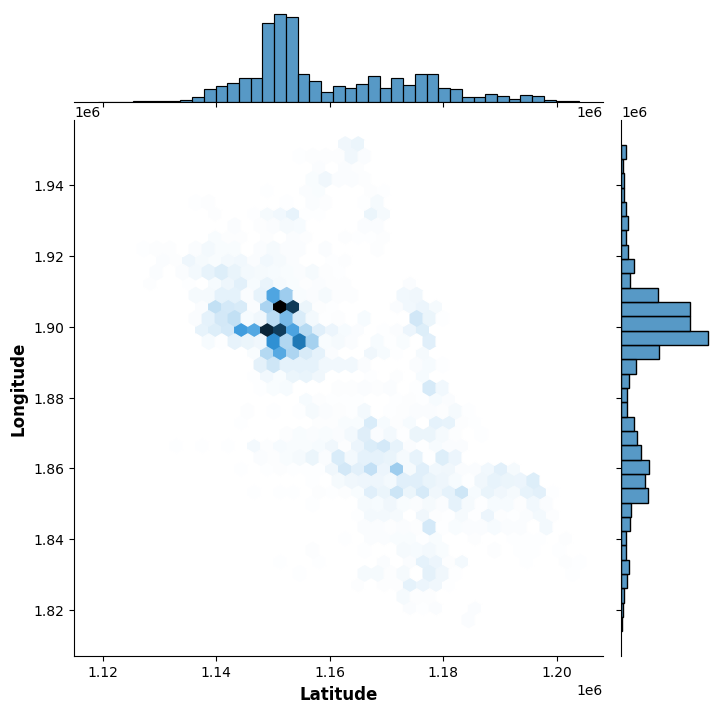

In [40]:
#Which region is a given Crime concentrated in ?
c = input("Enter the crime you wish to see the concentration of in the city >> ")    #take the crime as an input 
crime_df = df_filtered[df_filtered['Primary Type']==c.upper()]
print(crime_df['District'].value_counts().head(1))

sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values, height=7, kind='hex')

plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
plt.show()

19.0    3192
Name: District, dtype: int64


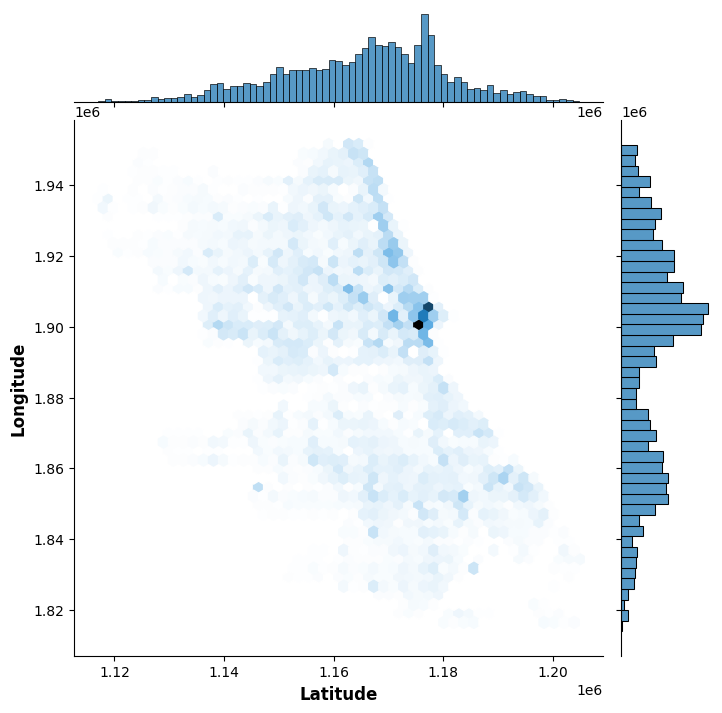

In [43]:
c = input("Enter the crime you wish to see the concentration of in the city >> ")    #take the crime as an input 
crime_df = df_filtered[df_filtered['Primary Type']==c.upper()]
print(crime_df['District'].value_counts().head(1))

sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values, height=7, kind='hex')

plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
plt.show()

In [44]:
# The probability of arrest of Chicago
state  = df_filtered["Arrest"].value_counts()
false = state[0]
true = state[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(state)})
print("The percentage of no arrests of all reported crimes is  :",false/(false+true)*100)

The percentage of no arrests of all reported crimes is  : 83.79893135091183


In [45]:
def month(x):
    return x.strftime("%B")
df_filtered['Month'] = df_filtered['Date'].apply(month)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\3465149729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['Date'].apply(month)


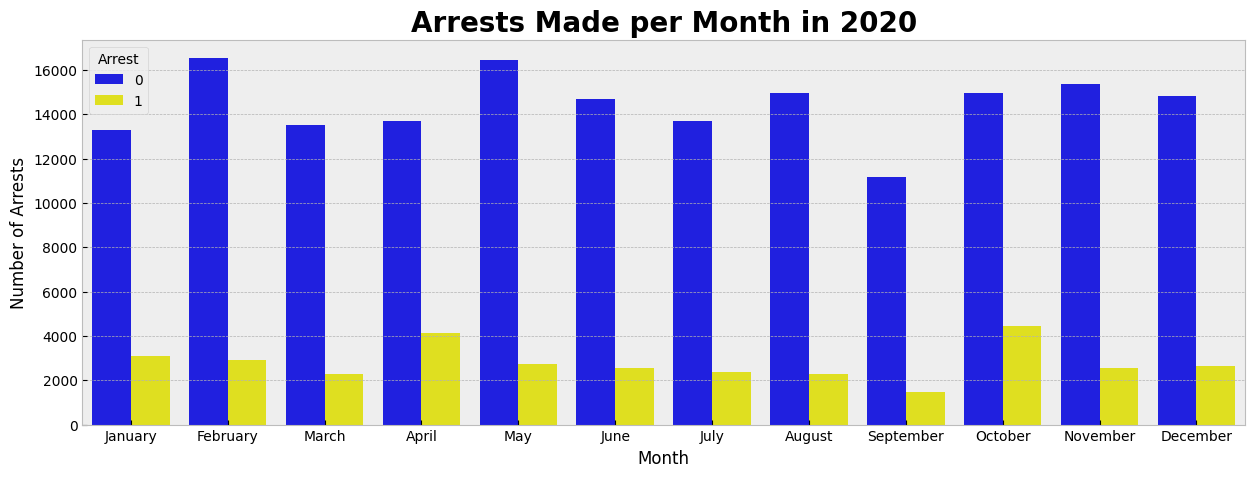

In [46]:
# How are arrests spread out across the months
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df_filtered[['Month','Arrest']],
                   palette=['Blue', 'Yellow'])
months = ['January','February','March','April','May','June','July',
             'August','September','October','November','December']    

ax.set(title='Arrests Made per Month in 2020', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month in 2020', fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
plt.show()

In [49]:
def hour(x):
    return x.strftime("%H")
df_filtered['Hour_Day'] = df_filtered['Date'].apply(hour)


C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\4147847261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour_Day'] = df_filtered['Date'].apply(hour)


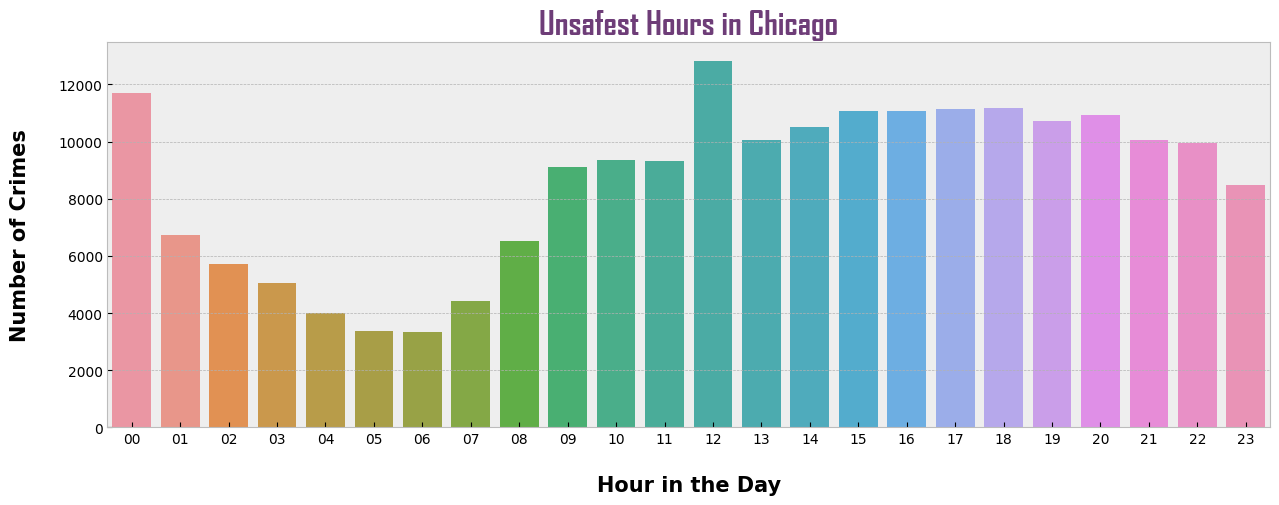

In [50]:
# the unsafest hours in chicago
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='Hour_Day', data=df_filtered, order=df_filtered['Hour_Day'].value_counts().sort_index().index)
# ploting
plt.title("Unsafest Hours in Chicago", fontdict={'fontsize': 24, 'color': '#6e3d78','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")
plt.show()

# 3.3 correlations

In [52]:

def new_hour(x):
    return int(x.strftime("%H"))
df_filtered['Hour'] = df_filtered['Date'].apply(new_hour)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\410603189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered['Date'].apply(new_hour)


In [53]:
crimes_per_hour = df_filtered.groupby('Hour').size().reset_index(name='num_of_crimes')

print(crimes_per_hour)

correlation_matrix = crimes_per_hour[['num_of_crimes', 'Hour']].corr()

# Print the correlation matrix
print(correlation_matrix)

    Hour  num_of_crimes
0      0          11698
1      1           6721
2      2           5725
3      3           5056
4      4           3997
5      5           3357
6      6           3347
7      7           4409
8      8           6518
9      9           9117
10    10           9347
11    11           9323
12    12          12832
13    13          10046
14    14          10502
15    15          11063
16    16          11088
17    17          11127
18    18          11181
19    19          10707
20    20          10939
21    21          10065
22    22           9954
23    23           8497
               num_of_crimes      Hour
num_of_crimes       1.000000  0.598947
Hour                0.598947  1.000000


# heatmaps

In [54]:
# replacing in Domestic (Let's use Label Encoding)
df_filtered['Location Description'] = df_filtered['Location Description'].astype('category')
df_filtered['Domestic'] = df_filtered['Domestic'].astype('category')
# new_df['Primary Type'] = new_df['Primary Type'].astype('category')
# new_df.dtypes
df_filtered['Location_Cat'] = df_filtered['Location Description'].cat.codes
df_filtered['Domestic_Cat'] = df_filtered['Domestic'].cat.codes
# new_df['Crime_Cat'] = new_df['Primary Type'].cat.codes
df_filtered.head()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\328918548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Location Description'] = df_filtered['Location Description'].astype('category')
C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\328918548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Domestic'] = df_filtered['Domestic'].astype('category')
C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\328918548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,...,Location,date,time,month,day,Month,Hour_Day,Hour,Location_Cat,Domestic_Cat
0,12017866,2020-03-26 09:43:00,003XX W 106TH ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,5.0,49.0,...,"(41.70159803, -87.631457762)",2020-03-26,09:43:00,3,26,March,09,9,122,1
1,12134350,2020-08-12 21:30:00,0000X W 44TH ST,THEFT,$500 AND UNDER,STREET,0,0,2.0,38.0,...,"(41.814661612, -87.627612832)",2020-08-12,21:30:00,8,12,August,21,21,146,0
2,12132901,2020-08-10 23:12:00,030XX N SPAULDING AVE,WEAPONS VIOLATION,UNLAWFUL USE - HANDGUN,ALLEY,0,0,14.0,21.0,...,"(41.936653521, -87.709982522)",2020-08-10,23:12:00,8,10,August,23,23,14,0
3,12137507,2020-08-12 19:00:00,014XX E 55TH ST,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,0,0,2.0,41.0,...,"(41.795528029, -87.589690678)",2020-08-12,19:00:00,8,12,August,19,19,146,0
4,12132353,2020-08-11 15:45:00,076XX S COLES AVE,THEFT,$500 AND UNDER,APARTMENT,0,0,4.0,43.0,...,"(41.756842894, -87.555458776)",2020-08-11,15:45:00,8,11,August,15,15,16,0


In [55]:
gang_crimes = ['NARCOTICS', 'HOMICIDE', 'WEAPONS VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'KIDNAPPING', 'BURGLARY']
gang_df = df_filtered[df_filtered['Primary Type'].isin(gang_crimes)]
gang_df.shape

(25337, 26)

In [57]:
def new_month(x):
    return int(x.strftime("%m"))
gang_df['Month_num'] = gang_df['Date'].apply(new_month)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\3960884920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gang_df['Month_num'] = gang_df['Date'].apply(new_month)


C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\1738732052.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  cri3 = cri3.pivot("District", "Month_num", "Primary Type")


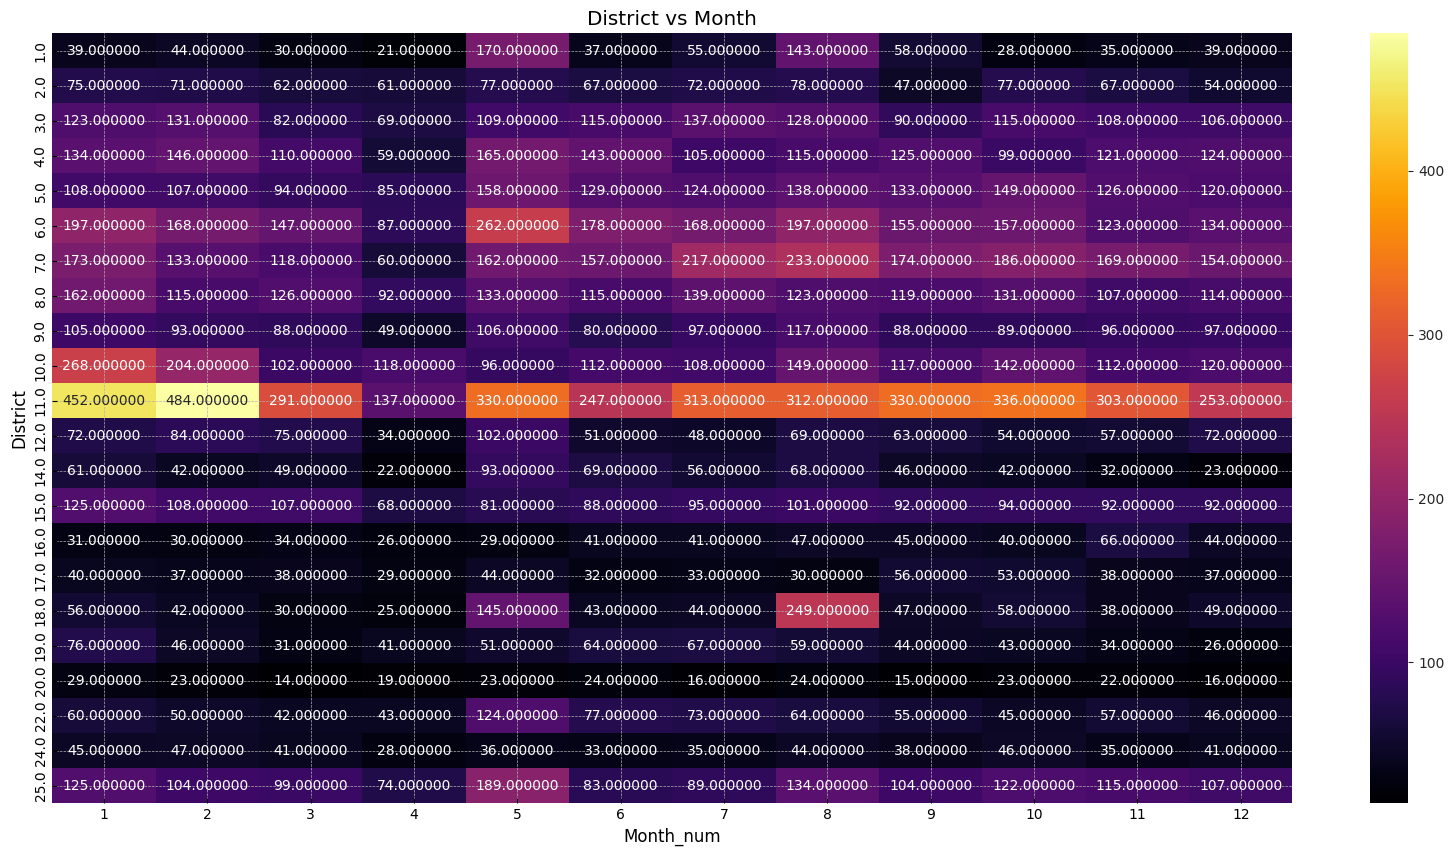

In [58]:
# Plotting for District vs Month in Gang crimes
cri3 = gang_df.groupby(['District','Month_num'],as_index=False).agg({'Primary Type':"count"})
cri3.columns

cri3 = cri3.pivot("District", "Month_num", "Primary Type")


plt.figure(figsize = (20,10))
plt.title("District vs Month")
with sns.axes_style("white"):
    sns.heatmap(cri3, mask=cri3.isnull(), cmap="inferno", annot=True, fmt="f")

<a id='Model'></a>
## 4. Model

In [61]:
cols = ['Date', 'Block', 'Location Description', 'District', 'Primary Type']
new_df = df_filtered[cols]
new_df.head()

,Date,Block,Location Description,District,Primary Type
0,2020-03-26 09:43:00,003XX W 106TH ST,RESIDENCE,5.0,BATTERY
1,2020-08-12 21:30:00,0000X W 44TH ST,STREET,2.0,THEFT
2,2020-08-10 23:12:00,030XX N SPAULDING AVE,ALLEY,14.0,WEAPONS VIOLATION
3,2020-08-12 19:00:00,014XX E 55TH ST,STREET,2.0,MOTOR VEHICLE THEFT
4,2020-08-11 15:45:00,076XX S COLES AVE,APARTMENT,4.0,THEFT


In [64]:

def new_hour(x):
    return int(x.strftime("%H"))
new_df['Hour'] = new_df['Date'].apply(new_hour)


def new_day(x):
    return int(x.strftime("%w"))
new_df['Day'] = new_df['Date'].apply(new_day)

def new_month(x):
    return int(x.strftime("%m"))
new_df['Month_num'] = new_df['Date'].apply(new_month)



C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\1018878578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Hour'] = new_df['Date'].apply(new_hour)
C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\1018878578.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Day'] = new_df['Date'].apply(new_day)
C:\Users\mahmo\AppData\Local\Temp\ipykernel_22760\1018878578.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [ ]:
from datetime import datetime
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date


# Using apply() of pandas to apply time_convert on every row of the Date column
new_df['Date'] = new_df['Date'].apply(time_convert)

In [66]:
#هنا احنا هناخد اليوم و الشهر والساعه لكل منطقه وهنشوف عدد الجرايم البتحصل في الوقت دا 

cri4 = new_df.groupby(['Month_num','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
cri4 = cri4.sort_values(by=['District'], ascending=False)


In [67]:
#هنا عايزين نشوف متوسط الجرايم في اليوم في الساعه لكلك منطقه 

print("Average no. of crime per month per day per district per hour :", cri4['Primary Type'].mean())

Average no. of crime per month per day per district per hour : 4.9452143318733395


In [ ]:
# هيطلع معانا 5 ف هنعمل classifcation 

#So, let's take 5 as the threshold values for categorising the crimes as low and high crime rates.

#0-5 : Low Crime Rate
#6-11 : Medium Crime Rate
#12-to max : High Crime Rate

In [68]:
#هنا هنبدأ نفرز 
# we will say that normal 


def crime_rate_assign(x):
    if(x<=5):
        return 0
    elif(x>5 and x<=11):
        return 1
    else:
        return 2
    
cri4['Alarm'] = cri4['Primary Type'].apply(crime_rate_assign)
cri4 = cri4[['Month_num','Day','Hour','District','Primary Type','Alarm']]
print(cri4.head())

sum_of_alarm=cri4['Alarm'].value_counts()


# كده 0 يعني معدل جريمه منخفض
#1 يعني معدل الجريمه متوسط 
# 2 معدل الجريمه عالي 

       Month_num  Day  Hour  District  Primary Type  Alarm
41780         12    6    23      25.0             6      1
38323         11    6    17      25.0             5      0
38321         11    6    15      25.0             8      1
38320         11    6    14      25.0             3      0
38319         11    6    13      25.0             7      1


In [69]:
#السطر دا هنحتاجه بعدين علشنا هنعرف منه كم الداتا ال هيتعملها Predicted  

print(sum(sum_of_alarm)*0.25)

print(round(cri4['Alarm'].value_counts()*0.25))


10445.25
0    6630.0
1    3409.0
2     406.0
Name: Alarm, dtype: float64


In [70]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn import tree
from sklearn.tree import plot_tree

# يعني من الكولمز دي المفروض بنحط امعدل الجريمه مش العكس 
# independent 

X = cri4[['Month_num', 'Day', 'Hour', 'District']] 

# دا المفروض هندرب الاله عليه 
# dependent
y = cri4['Alarm'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100) # 75:25 split
d_tree = DecisionTreeClassifier(max_depth=10)
d_tree = d_tree.fit(X_train, y_train)
# Predicting !

y_pred = d_tree.predict(X_test)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy: 71.34788435764887 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1   2
Actual Alarm                   
0                5453  1092   7
1                1463  1993  10
2                  65   356   7

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      6552
           1       0.58      0.58      0.58      3466
           2       0.29      0.02      0.03       428

    accuracy                           0.71     10446
   macro avg       0.55      0.47      0.47     10446
weighted avg       0.69      0.71      0.70     10446



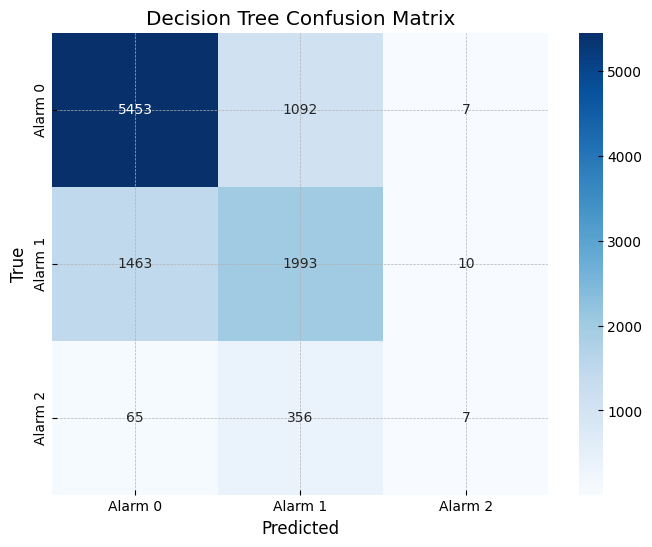

In [71]:

# Confusion matrix for Decision Tree
dt_confusion_matrix = cm

class_labels = ['Alarm 0', 'Alarm 1', 'Alarm 2']

# Plotting Decision Tree Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
# Here we Check what is the best Max depth Give us the best Accurrcy

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None , 2 , 4, 6, 10, 20]}  

# Perform grid search using cross-validation
grid_search = GridSearchCV(d_tree, param_grid)
grid_search.fit(X_train, y_train)

print("Best Depth:", grid_search.best_params_['max_depth'])

Best Depth: 10


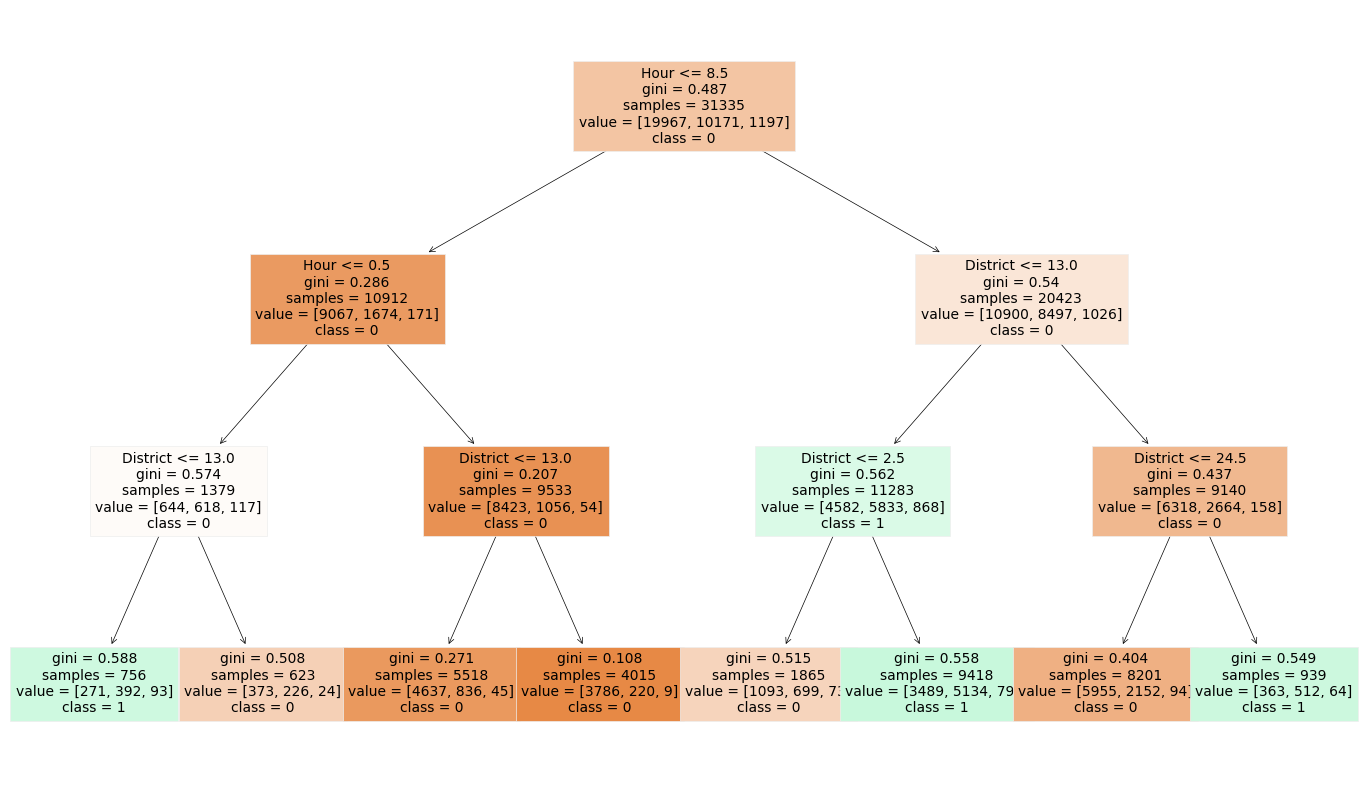

In [73]:
plt.figure("decision Tree",figsize=[14,8])

d2_tree = DecisionTreeClassifier(max_depth=3)
d2_tree = d2_tree.fit(X_train, y_train)

featuer_names=['Month_num', 'Day', 'Hour', 'District']
Target_name=["0","1","2"]

plot_tree(d2_tree,filled=True,fontsize=10,feature_names=featuer_names,class_names=Target_name)

plt.tight_layout()
plt.show()

In [74]:
# Using Random Forest for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X = cri4[['Month_num', 'Day', 'Hour', 'District']] 

# دا المفروض هندرب الاله عليه 
# dependent
y = cri4['Alarm'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 1,max_depth=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("----------------------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("-------------------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))


Accuracy: 72.34348075818495 

----------------------Confusion Matrix------------------------------------
Predicted Alarm     0     1  2
Actual Alarm                  
0                5551  1099  0
1                1383  2004  2
2                  57   348  2
-------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      6650
           1       0.58      0.59      0.59      3389
           2       0.50      0.00      0.01       407

    accuracy                           0.72     10446
   macro avg       0.62      0.48      0.47     10446
weighted avg       0.71      0.72      0.71     10446



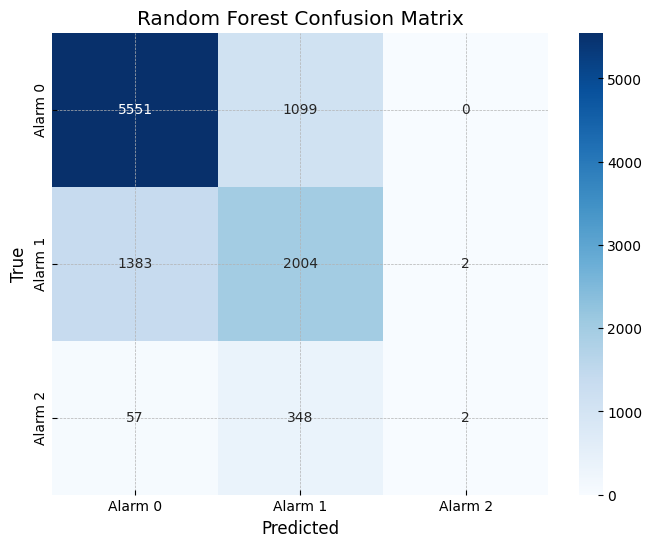

In [75]:

# Confusion matrix for Random Forest
rf_confusion_matrix =cm


class_labels = ['Alarm 0', 'Alarm 1', 'Alarm 2']

# Plotting Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
